## POS tagging using modified Viterbi

### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import time, re
import random
from collections import Counter
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
# for warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [4]:
# checking first few words from data corpus
print(nltk_data[:5])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [5]:
# length of the data set
len(nltk_data)

3914

In [6]:
# splitting the data in train(95%) and test(5%) set
random.seed(111)
train_set, test_set = train_test_split(nltk_data, test_size = 0.05)
print(len(train_set))
print(len(test_set))

3718
196


In [7]:
# list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95510

In [8]:
# list of tagged words in test set
test_tagged_words = [tup for sent in test_set for tup in sent]
len(test_tagged_words)

5166

In [9]:
# visualizing train_tagged_words
train_tagged_words

[('He', 'PRON'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('the', 'DET'),
 ('ban', 'NOUN'),
 ('wo', 'VERB'),
 ("n't", 'ADV'),
 ('stop', 'VERB'),
 ('privately', 'ADV'),
 ('funded', 'VERB'),
 ('tissue-transplant', 'ADJ'),
 ('research', 'NOUN'),
 ('or', 'CONJ'),
 ('federally', 'ADV'),
 ('funded', 'VERB'),
 ('fetal-tissue', 'ADJ'),
 ('research', 'NOUN'),
 ('that', 'DET'),
 ('*T*-111', 'X'),
 ('does', 'VERB'),
 ("n't", 'ADV'),
 ('involve', 'VERB'),
 ('transplants', 'NOUN'),
 ('.', '.'),
 ('Now', 'ADV'),
 ('the', 'DET'),
 ('stage', 'NOUN'),
 ('is', 'VERB'),
 ('set', 'VERB'),
 ('*-76', 'X'),
 ('for', 'ADP'),
 ('the', 'DET'),
 ('battle', 'NOUN'),
 ('to', 'PRT'),
 ('play', 'VERB'),
 ('out', 'ADP'),
 ('.', '.'),
 ('Despite', 'ADP'),
 ('the', 'DET'),
 ('flap', 'NOUN'),
 ('over', 'ADP'),
 ('transplants', 'NOUN'),
 (',', '.'),
 ('federal', 'ADJ'),
 ('funding', 'NOUN'),
 ('of', 'ADP'),
 ('research', 'NOUN'),
 ('involving', 'VERB'),
 ('fetal', 'ADJ'),
 ('tissues', 'NOUN'),
 ('will', 'VERB'),
 ('continue', 'V

In [10]:
# visualizing test_tagged_words
test_tagged_words

[('Nekoosa', 'NOUN'),
 ('has', 'VERB'),
 ('given', 'VERB'),
 ('the', 'DET'),
 ('offer', 'NOUN'),
 ('a', 'DET'),
 ('public', 'ADJ'),
 ('cold', 'ADJ'),
 ('shoulder', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('reaction', 'NOUN'),
 ('0', 'X'),
 ('Mr.', 'NOUN'),
 ('Hahn', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('faced', 'VERB'),
 ('*T*-2', 'X'),
 ('in', 'ADP'),
 ('his', 'PRON'),
 ('18', 'NUM'),
 ('earlier', 'ADJ'),
 ('acquisitions', 'NOUN'),
 (',', '.'),
 ('all', 'DET'),
 ('of', 'ADP'),
 ('which', 'DET'),
 ('*T*-3', 'X'),
 ('were', 'VERB'),
 ('negotiated', 'VERB'),
 ('*-1', 'X'),
 ('behind', 'ADP'),
 ('the', 'DET'),
 ('scenes', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('Just', 'ADV'),
 ('a', 'DET'),
 ('blind', 'ADJ'),
 ('fear', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('unknown', 'NOUN'),
 ('is', 'VERB'),
 ('causing', 'VERB'),
 ('them', 'PRON'),
 ('to', 'PRT'),
 ('beg', 'VERB'),
 ('the', 'DET'),
 ('regulators', 'NOUN'),
 ('for', 'ADP'),
 ('protection', 'NOUN'),
 ('.', '.'),
 ("''", '.'),
 

In [11]:
# segregating and extracting individual tokens and checking the set
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]
V = set(tokens)
print(V)
print(len(V))

{'just', '22\\/32', 'Eggers', 'four', 'participate', 'unimpeded', '93.9', 'petition', '94.8', 'fuming', '397', 'Wilfred', 'racket', 'busloads', '155', 'Chandler', '20,000', 'spiders', 'Plaza', 'sweetened', 'circuit', 'predictably', 'options', 'withdrew', 'degree', 'Vose', 'entertain', 'Hahn', 'budding', '*-12', 'lion', '80', 'near-limit', 'Riviera', '415', 'phony', 'agreement', 'September', 'controlling', '7.45', 'travel-related', 'Olson', 'college', 'yttrium-containing', 'Jeffrey', 'October', 'Viacom', 'sparking', 'France', 'unjustified', '8.70', 'weaken', 'trailed', 'sassy', 'studied', 'judged', 'skyward', 'Occupational', 'actions', '960', 'Mortgage-Backed', '34.625', 'bomber', 'harass', '78', 'Value', '*-50', '963', 'probably', 'sharply', 'Sol', 'Lowe', 'Freddie', 'Nesconset', 'carrier', 'Riserva', 'Jaffray', 'welcomed', 'manner', 'comparable', 'tremendous', 'ratified', 'execution', 'youth', 'press', 'burn', 'YWCA', 'Sullivan', 'transformed', 'acceptances', 'Resistance', 'Handelsban

In [12]:
token_tag = [pair[1] for pair in train_tagged_words]
tags = Counter(token_tag)
tags.most_common()

[('NOUN', 27372),
 ('VERB', 12902),
 ('.', 11087),
 ('ADP', 9336),
 ('DET', 8280),
 ('X', 6292),
 ('ADJ', 6062),
 ('NUM', 3367),
 ('PRT', 3076),
 ('ADV', 3016),
 ('PRON', 2587),
 ('CONJ', 2133)]

We observe that our the most commonly occuring tag is the "NOUN" tag followed by "VERB".

In [13]:
# unique POS tags in the train set corpus
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

Hence there are 12 different tags in the corpus

### Build the vanilla Viterbi based POS tagger

Emission Probabilities

In [14]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [15]:
# compute word given tag emission probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    
    tag_list = [pair for pair in train_bag if pair[1] == tag]
    
    count_tag = len(tag_list)
    
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0].lower() == word.lower() ]
    
    count_w_given_tag = len(w_given_tag_list)
    
    return(count_w_given_tag, count_tag)

In [16]:
# compute Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    
    tags = [tup[1] for tup in train_bag]
    
    count_t1 = len([t for t in tags if t == t1])
    
    count_t2_t1 = 0
    
    for index in range(len(tags)-1):
        
        if tags[index]==t1 and tags[index+1] == t2:
            
            count_t2_t1 +=1
            
    return (count_t2_t1, count_t1)

In [17]:
# creating tag matrix
tags_matrix = np.zeros((len(T), len(T)), dtype = 'float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)):
        tags_matrix[i,j] = t2_given_t1(t2,t1)[0]/t2_given_t1(t2,t1)[1]

In [18]:
tags_matrix

array([[6.59848228e-02, 4.78389952e-03, 6.49950504e-02, 1.12174200e-02,
        1.27020786e-02, 1.64962057e-02, 4.45397571e-03, 2.17749923e-02,
        6.59848214e-04, 7.88518637e-02, 2.07852200e-02, 6.97294593e-01],
       [2.05676332e-01, 5.43478271e-03, 1.77536234e-02, 2.41545888e-04,
        3.97343002e-02, 4.83091775e-04, 1.20772943e-02, 4.55313995e-02,
        3.50241549e-03, 9.17874370e-03, 2.17391308e-02, 6.38647318e-01],
       [4.38351221e-02, 1.74438536e-01, 9.23604220e-02, 2.52548023e-03,
        8.92035738e-02, 5.86272217e-02, 5.29448912e-02, 2.68783253e-02,
        6.48507252e-02, 9.10074860e-02, 8.17173272e-02, 2.21520707e-01],
       [8.32249671e-02, 1.02405719e-01, 4.29128744e-02, 1.95058517e-03,
        4.03771132e-01, 1.62548770e-03, 1.00780232e-02, 1.39791938e-02,
        1.75552666e-02, 2.04811450e-02, 5.52665815e-02, 2.46749029e-01],
       [6.54162169e-02, 1.33390173e-01, 3.51108350e-02, 3.18555273e-02,
        1.68888539e-01, 5.58053004e-03, 8.22353140e-02, 2.18

In [19]:
# matrix to df
tag_df = pd.DataFrame(tags_matrix, columns=list(T), index=list(T))
tag_df

,ADJ,DET,.,PRT,VERB,CONJ,ADV,X,PRON,ADP,NUM,NOUN
ADJ,0.065985,0.004784,0.064995,0.011217,0.012702,0.016496,0.004454,0.021775,0.000660,0.078852,0.020785,0.697295
DET,0.205676,0.005435,0.017754,0.000242,0.039734,0.000483,0.012077,0.045531,0.003502,0.009179,0.021739,0.638647
.,0.043835,0.174439,0.092360,0.002525,0.089204,0.058627,0.052945,0.026878,0.064851,0.091007,0.081717,0.221521
PRT,0.083225,0.102406,0.042913,0.001951,0.403771,0.001625,0.010078,0.013979,0.017555,0.020481,0.055267,0.246749
VERB,0.065416,0.133390,0.035111,0.031856,0.168889,0.005581,0.082235,0.218571,0.035808,0.090684,0.022555,0.109905
CONJ,0.118612,0.117675,0.035631,0.004688,0.157525,0.000469,0.052977,0.008908,0.060009,0.053446,0.042663,0.347398
ADV,0.126326,0.068302,0.137268,0.014589,0.348475,0.006631,0.078912,0.023210,0.015584,0.118369,0.031167,0.031167
X,0.017324,0.055308,0.162746,0.186427,0.203274,0.010331,0.025747,0.074221,0.055467,0.143516,0.002702,0.062937
PRON,0.073444,0.009664,0.040201,0.011983,0.484731,0.005412,0.035176,0.091225,0.007344,0.023966,0.006958,0.209896
ADP,0.105827,0.324979,0.039524,0.001285,0.008248,0.000857,0.013925,0.035133,0.068338,0.016817,0.063089,0.321979


In [20]:
# word tags followed by '.' or start of sentence
tag_df.loc['.',:]

ADJ     0.043835
DET     0.174439
.       0.092360
PRT     0.002525
VERB    0.089204
CONJ    0.058627
ADV     0.052945
X       0.026878
PRON    0.064851
ADP     0.091007
NUM     0.081717
NOUN    0.221521
Name: ., dtype: float32

22% sentences start with Nouns is followed by fullstops and 17% Determiners are followed after a '.'.

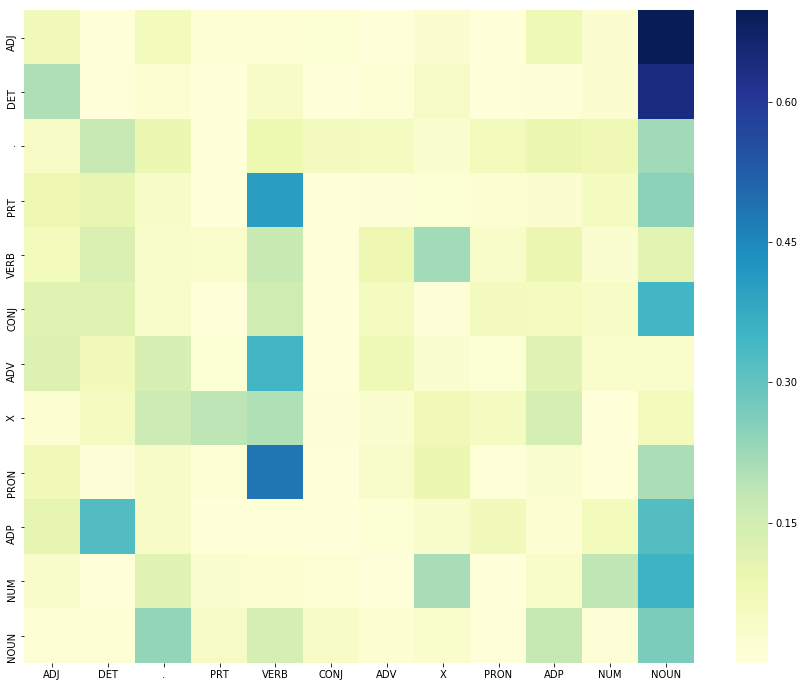

In [21]:
# heatmap
plt.figure(figsize= (15,12))
sns.heatmap(tag_df,cmap="YlGnBu")
plt.show()

In [22]:
# Vanila Viterbi Heuristic
def viterbi(words, train_set = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_set]))
    
    for key, word in enumerate(words):
        p = []
        
        for tag in T:
            if key == 0:
                
                trans_p = tag_df.loc['.',tag]
                
            else:
                
                trans_p = tag_df.loc[state[-1],tag]
                
            # emission and state probabilites
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            state_probability = emission_p * trans_p
            
            p.append(state_probability)
            
        pmax = max(p)
        
        state_max = T[p.index(pmax)]
        
        state.append(state_max)
        
    return list(zip(words, state))

In [23]:
# Validation on test set

test_set_base = [tup for sent in test_set for tup in sent]

#For untagged
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_tagged_words

['Nekoosa',
 'has',
 'given',
 'the',
 'offer',
 'a',
 'public',
 'cold',
 'shoulder',
 ',',
 'a',
 'reaction',
 '0',
 'Mr.',
 'Hahn',
 'has',
 "n't",
 'faced',
 '*T*-2',
 'in',
 'his',
 '18',
 'earlier',
 'acquisitions',
 ',',
 'all',
 'of',
 'which',
 '*T*-3',
 'were',
 'negotiated',
 '*-1',
 'behind',
 'the',
 'scenes',
 '.',
 '``',
 'Just',
 'a',
 'blind',
 'fear',
 'of',
 'the',
 'unknown',
 'is',
 'causing',
 'them',
 'to',
 'beg',
 'the',
 'regulators',
 'for',
 'protection',
 '.',
 "''",
 'You',
 'do',
 "n't",
 'want',
 '*-1',
 'to',
 'get',
 'yourself',
 'too',
 'upset',
 'about',
 'these',
 'things',
 '.',
 'Despite',
 'one',
 'of',
 'the',
 'most',
 'devastating',
 'droughts',
 'on',
 'record',
 ',',
 'net',
 'cash',
 'income',
 'in',
 'the',
 'Farm',
 'Belt',
 'rose',
 'to',
 'a',
 'new',
 'high',
 'of',
 '$',
 '59.9',
 'billion',
 '*U*',
 'last',
 'year',
 '.',
 'University',
 'Patents',
 'Inc.',
 ',',
 'based',
 '*',
 'in',
 'Westport',
 ',',
 'Conn.',
 ',',
 'said',
 '0'

In [24]:
# testing the Vanilla viterbi

start = time.time()

tagged_set = viterbi(test_tagged_words)

end = time.time()

diff = end-start

In [25]:
print("time taken in mins: ", diff/60)
#print(tagged_set)
pprint.pprint(tagged_set)

time taken in mins:  23.91104155778885
[('Nekoosa', 'NOUN'),
 ('has', 'VERB'),
 ('given', 'VERB'),
 ('the', 'DET'),
 ('offer', 'NOUN'),
 ('a', 'DET'),
 ('public', 'ADJ'),
 ('cold', 'NOUN'),
 ('shoulder', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('reaction', 'NOUN'),
 ('0', 'X'),
 ('Mr.', 'NOUN'),
 ('Hahn', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('faced', 'VERB'),
 ('*T*-2', 'X'),
 ('in', 'ADP'),
 ('his', 'PRON'),
 ('18', 'NUM'),
 ('earlier', 'ADJ'),
 ('acquisitions', 'NOUN'),
 (',', '.'),
 ('all', 'DET'),
 ('of', 'ADP'),
 ('which', 'DET'),
 ('*T*-3', 'X'),
 ('were', 'VERB'),
 ('negotiated', 'VERB'),
 ('*-1', 'X'),
 ('behind', 'ADP'),
 ('the', 'DET'),
 ('scenes', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('Just', 'ADV'),
 ('a', 'DET'),
 ('blind', 'ADJ'),
 ('fear', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('unknown', 'ADJ'),
 ('is', 'VERB'),
 ('causing', 'VERB'),
 ('them', 'PRON'),
 ('to', 'PRT'),
 ('beg', 'ADJ'),
 ('the', 'DET'),
 ('regulators', 'NOUN'),
 ('for', 'ADP'),
 ('protection',

 ("'s", 'PRT'),
 ('directors', 'NOUN'),
 (',', '.'),
 ('Burt', 'ADJ'),
 ('Sugarman', 'ADJ'),
 (',', '.'),
 ('James', 'NOUN'),
 ('M.', 'NOUN'),
 ('Trotter', 'ADJ'),
 ('III', 'NOUN'),
 ('and', 'CONJ'),
 ('William', 'NOUN'),
 ('E.', 'NOUN'),
 ('Trotter', 'ADJ'),
 ('II', 'NOUN'),
 (',', '.'),
 ('who', 'PRON'),
 ('last', 'ADJ'),
 ('month', 'NOUN'),
 ('*T*-1', 'X'),
 ('indicated', 'VERB'),
 ('0', 'X'),
 ('they', 'PRON'),
 ('hold', 'VERB'),
 ('a', 'DET'),
 ('42.5', 'ADJ'),
 ('%', 'NOUN'),
 ('stake', 'NOUN'),
 ('in', 'ADP'),
 ('Rally', 'NOUN'),
 ("'s", 'PRT'),
 ('and', 'CONJ'),
 ('plan', 'NOUN'),
 ('*-2', 'X'),
 ('to', 'PRT'),
 ('seek', 'VERB'),
 ('a', 'DET'),
 ('majority', 'NOUN'),
 ('of', 'ADP'),
 ('seats', 'NOUN'),
 ('on', 'ADP'),
 ('Rally', 'NOUN'),
 ("'s", 'PRT'),
 ('nine-member', 'ADJ'),
 ('board', 'NOUN'),
 ('.', '.'),
 ('Characters', 'ADJ'),
 ('drink', 'NOUN'),
 ('Salty', 'ADJ'),
 ('Dogs', 'ADJ'),
 (',', '.'),
 ('whistle', 'ADJ'),
 ('``', '.'),
 ('Johnny', 'ADJ'),
 ('B.', 'NOUN'),
 ('G

 ('*T*-2', 'X'),
 ('indicated', 'VERB'),
 ('0', 'X'),
 ('they', 'PRON'),
 ('had', 'VERB'),
 ('a', 'DET'),
 ('42.5', 'ADJ'),
 ('%', 'NOUN'),
 ('stake', 'NOUN'),
 ('in', 'ADP'),
 ('Rally', 'NOUN'),
 ("'s", 'PRT'),
 ('and', 'CONJ'),
 ('planned', 'VERB'),
 ('*-3', 'X'),
 ('to', 'PRT'),
 ('seek', 'VERB'),
 ('a', 'DET'),
 ('majority', 'NOUN'),
 ('of', 'ADP'),
 ('seats', 'NOUN'),
 ('on', 'ADP'),
 ('Rally', 'NOUN'),
 ("'s", 'PRT'),
 ('nine-member', 'ADJ'),
 ('board', 'NOUN'),
 ('.', '.'),
 ('Takuma', 'NOUN'),
 ('Yamamoto', 'NOUN'),
 (',', '.'),
 ('president', 'NOUN'),
 ('of', 'ADP'),
 ('Fujitsu', 'NOUN'),
 ('Ltd.', 'NOUN'),
 (',', '.'),
 ('believes', 'VERB'),
 ('``', '.'),
 ('0', 'X'),
 ('the', 'DET'),
 ('`', '.'),
 ('money', 'NOUN'),
 ('worship', 'NOUN'),
 ("'", 'PRT'),
 ('among', 'ADP'),
 ('young', 'ADJ'),
 ('people', 'NOUN'),
 ('...', '.'),
 ('caused', 'VERB'),
 ('the', 'DET'),
 ('problem', 'NOUN'),
 ('.', '.'),
 ("''", '.'),
 ('USX', 'NOUN'),
 ('was', 'VERB'),
 ('cited', 'VERB'),
 ('*-1', 

 ('the', 'DET'),
 ('decision', 'NOUN'),
 ('0', 'X'),
 ('I', 'PRON'),
 ('reached', 'VERB'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ("''", '.'),
 ('Peter', 'NOUN'),
 ('Holland', 'ADJ'),
 (',', '.'),
 ('45', 'NUM'),
 (',', '.'),
 ('deputy', 'NOUN'),
 ('general', 'NOUN'),
 ('manager', 'NOUN'),
 (',', '.'),
 ('becomes', 'VERB'),
 ('director', 'NOUN'),
 ('of', 'ADP'),
 ('corporate', 'ADJ'),
 ('affairs', 'NOUN'),
 ('.', '.'),
 ('Mr.', 'NOUN'),
 ('Nixon', 'NOUN'),
 ('is', 'VERB'),
 ('traveling', 'VERB'),
 ('in', 'ADP'),
 ('China', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('private', 'ADJ'),
 ('citizen', 'NOUN'),
 (',', '.'),
 ('but', 'CONJ'),
 ('he', 'PRON'),
 ('has', 'VERB'),
 ('made', 'VERB'),
 ('clear', 'ADJ'),
 ('that', 'ADP'),
 ('he', 'PRON'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('unofficial', 'ADJ'),
 ('envoy', 'ADJ'),
 ('for', 'ADP'),
 ('the', 'DET'),
 ('Bush', 'NOUN'),
 ('administration', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('The', 'DET'),
 ('events', 'NOUN'),
 ('of', 'ADP'),
 ('April', 'NOUN')

 ('.', '.'),
 ('However', 'ADV'),
 (',', '.'),
 ('the', 'DET'),
 ('junk-bond', 'NOUN'),
 ('market', 'NOUN'),
 ('has', 'VERB'),
 ('collapsed', 'VERB'),
 ('in', 'ADP'),
 ('recent', 'ADJ'),
 ('weeks', 'NOUN'),
 (',', '.'),
 ('*', 'X'),
 ('lessening', 'ADJ'),
 ('the', 'DET'),
 ('likelihood', 'ADJ'),
 ('that', 'ADP'),
 ('such', 'ADJ'),
 ('a', 'DET'),
 ('transaction', 'NOUN'),
 ('would', 'VERB'),
 ('succeed', 'VERB'),
 ('.', '.'),
 ('Scott', 'NOUN'),
 ('Taccetta', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('Chicago', 'NOUN'),
 ('accountant', 'ADJ'),
 (',', '.'),
 ('is', 'VERB'),
 ('going', 'VERB'),
 ('into', 'ADP'),
 ('money-market', 'ADJ'),
 ('funds', 'NOUN'),
 ('.', '.'),
 ('Gary', 'NOUN'),
 ('Hoffman', 'ADJ'),
 (',', '.'),
 ('a', 'DET'),
 ('Washington', 'NOUN'),
 ('lawyer', 'NOUN'),
 ('specializing', 'ADJ'),
 ('in', 'ADP'),
 ('intellectual-property', 'ADJ'),
 ('cases', 'NOUN'),
 (',', '.'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('the', 'DET'),
 ('threat', 'NOUN'),
 ('of', 'ADP'),
 ('U.S.', 'NOUN')

In [26]:
#accuracy
check = [i for i , j in zip(tagged_set, test_set_base) if i == j]
accuracy = len(check)/len(tagged_set)
accuracy*100

91.03755323267518

Accuracy is around ~ 90%

In [27]:
# The incorrect tags
unknown_tag = [[test_set_base[i-1],j] for i,j in enumerate(zip(tagged_set, test_set_base))if j[0]!= j[1]]
pprint.pprint(unknown_tag)

[[('public', 'ADJ'), (('cold', 'NOUN'), ('cold', 'ADJ'))],
 [('the', 'DET'), (('unknown', 'ADJ'), ('unknown', 'NOUN'))],
 [('to', 'PRT'), (('beg', 'ADJ'), ('beg', 'VERB'))],
 [('too', 'ADV'), (('upset', 'VERB'), ('upset', 'ADJ'))],
 [('the', 'DET'), (('most', 'ADJ'), ('most', 'ADV'))],
 [('most', 'ADV'), (('devastating', 'VERB'), ('devastating', 'ADJ'))],
 [('in', 'ADP'), (('Westport', 'ADJ'), ('Westport', 'NOUN'))],
 [('to', 'PRT'), (('license', 'ADJ'), ('license', 'VERB'))],
 [("''", '.'), (('evolve', 'ADJ'), ('evolve', 'VERB'))],
 [('evil', 'ADJ'), (('creature', 'ADJ'), ('creature', 'NOUN'))],
 [('creature', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('is', 'VERB'), (('evoking', 'ADJ'), ('evoking', 'VERB'))],
 [('the', 'DET'), (('curses', 'ADJ'), ('curses', 'NOUN'))],
 [(',', '.'), (('traced', 'ADJ'), ('traced', 'VERB'))],
 [('another', 'DET'), (('wave', 'ADJ'), ('wave', 'NOUN'))],
 [('for', 'ADP'), (('prescription', 'ADJ'), ('prescription', 'NOUN'))],
 [(',', '.'), (('hidden',

In [28]:
len(unknown_tag)

463

### Solve the problem of unknown words

In [29]:
# Vanila Viterbi Heuristic Modification - 1
def viterbi_mod1(words, train_set = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_set]))
    
    for key, word in enumerate(words):
        p = []
        
        for tag in T:
            if key == 0:
                
                trans_p = tag_df.loc['.',tag]
                
            else:
                
                trans_p = tag_df.loc[state[-1],tag]
                
            # emission and state probabilites
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            state_probability = emission_p * trans_p
            
            p.append(state_probability)
            
        pmax = max(p)
        
        if pmax == 0:
            state_max = 'NOUN'
        else:
            state_max = T[p.index(pmax)]
        
        state.append(state_max)
        
    return list(zip(words, state))

In [30]:
# testing the Modified Vanilla viterbi

start = time.time()

tagged__mod_set = viterbi_mod1(test_tagged_words)

end = time.time()

diff = end-start

In [31]:
print("time taken in mins: ", diff/60)
pprint.pprint(tagged__mod_set)

time taken in mins:  23.329827225208284
[('Nekoosa', 'NOUN'),
 ('has', 'VERB'),
 ('given', 'VERB'),
 ('the', 'DET'),
 ('offer', 'NOUN'),
 ('a', 'DET'),
 ('public', 'ADJ'),
 ('cold', 'NOUN'),
 ('shoulder', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('reaction', 'NOUN'),
 ('0', 'X'),
 ('Mr.', 'NOUN'),
 ('Hahn', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('faced', 'VERB'),
 ('*T*-2', 'X'),
 ('in', 'ADP'),
 ('his', 'PRON'),
 ('18', 'NUM'),
 ('earlier', 'ADJ'),
 ('acquisitions', 'NOUN'),
 (',', '.'),
 ('all', 'DET'),
 ('of', 'ADP'),
 ('which', 'DET'),
 ('*T*-3', 'X'),
 ('were', 'VERB'),
 ('negotiated', 'VERB'),
 ('*-1', 'X'),
 ('behind', 'ADP'),
 ('the', 'DET'),
 ('scenes', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('Just', 'ADV'),
 ('a', 'DET'),
 ('blind', 'ADJ'),
 ('fear', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('unknown', 'NOUN'),
 ('is', 'VERB'),
 ('causing', 'VERB'),
 ('them', 'PRON'),
 ('to', 'PRT'),
 ('beg', 'NOUN'),
 ('the', 'DET'),
 ('regulators', 'NOUN'),
 ('for', 'ADP'),
 ('protectio

 (',', '.'),
 ('however', 'ADV'),
 ('.', '.'),
 ('Takeover', 'NOUN'),
 ('experts', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('they', 'PRON'),
 ('doubted', 'VERB'),
 ('0', 'X'),
 ('the', 'DET'),
 ('financier', 'NOUN'),
 ('would', 'VERB'),
 ('make', 'VERB'),
 ('a', 'DET'),
 ('bid', 'NOUN'),
 ('by', 'ADP'),
 ('himself', 'PRON'),
 ('.', '.'),
 ('An', 'DET'),
 ('entirely', 'ADV'),
 ('new', 'ADJ'),
 ('band', 'NOUN'),
 ('*ICH*-2', 'X'),
 ('rings', 'NOUN'),
 ('today', 'NOUN'),
 ('at', 'ADP'),
 ('Great', 'ADJ'),
 ('Torrington', 'NOUN'),
 (',', '.'),
 ('several', 'ADJ'),
 ('of', 'ADP'),
 ('whom', 'PRON'),
 ('*T*-1', 'X'),
 ('are', 'VERB'),
 ('members', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('congregation', 'NOUN'),
 ('.', '.'),
 ('Silver', 'NOUN'),
 ('and', 'CONJ'),
 ('platinum', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('*T*-1', 'X'),
 ('have', 'VERB'),
 ('more', 'ADV'),
 ('of', 'ADP'),
 ('an', 'DET'),
 ('industrial', 'ADJ'),
 ('nature', 'NOUN'),
 ('than', 'ADP'),
 ('gold', 'NOUN'),
 (',

 ('trend', 'NOUN'),
 ('of', 'ADP'),
 ('financial', 'ADJ'),
 ('improvement', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('firmly', 'NOUN'),
 ('set', 'VERB'),
 (',', '.'),
 ("''", '.'),
 ('he', 'PRON'),
 ('added', 'VERB'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('Koito', 'NOUN'),
 ('has', 'VERB'),
 ('refused', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('grant', 'VERB'),
 ('Mr.', 'NOUN'),
 ('Pickens', 'NOUN'),
 ('seats', 'NOUN'),
 ('on', 'ADP'),
 ('its', 'PRON'),
 ('board', 'NOUN'),
 (',', '.'),
 ('*-1', 'X'),
 ('asserting', 'NOUN'),
 ('0', 'X'),
 ('he', 'PRON'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('greenmailer', 'NOUN'),
 ('trying', 'VERB'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('pressure', 'NOUN'),
 ('Koito', 'NOUN'),
 ("'s", 'PRT'),
 ('other', 'ADJ'),
 ('shareholders', 'NOUN'),
 ('into', 'ADP'),
 ('*', 'X'),
 ('buying', 'VERB'),
 ('him', 'PRON'),
 ('out', 'PRT'),
 ('at', 'ADP'),
 ('a', 'DET'),
 ('profit', 'NOUN'),
 ('.', '.'),
 ('On', 'ADP'),
 ('one', 'NUM'),
 ('side', 'NOUN'),
 ('of', 'ADP'),
 ('th

 ('Steel', 'NOUN'),
 ('Ltd', 'NOUN'),
 ('.', '.'),
 ('ECONOMIC', 'ADJ'),
 ('GROWTH', 'NOUN'),
 ('APPEARS', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('be', 'VERB'),
 ('leveling', 'VERB'),
 ('off', 'PRT'),
 (',', '.'),
 ('latest', 'ADJ'),
 ('reports', 'NOUN'),
 ('suggest', 'VERB'),
 ('0', 'X'),
 ('*T*-2', 'X'),
 ('.', '.'),
 ('``', '.'),
 ('If', 'ADP'),
 ('you', 'PRON'),
 ('could', 'VERB'),
 ('get', 'VERB'),
 ('the', 'DET'),
 ('rhythm', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('program', 'NOUN'),
 ('trading', 'NOUN'),
 (',', '.'),
 ('you', 'PRON'),
 ('could', 'VERB'),
 ('take', 'VERB'),
 ('advantage', 'NOUN'),
 ('of', 'ADP'),
 ('it', 'PRON'),
 ('.', '.'),
 ("''", '.'),
 ('Thus', 'ADV'),
 (',', '.'),
 ('with', 'ADP'),
 ('one', 'NUM'),
 ('brief', 'ADJ'),
 ('passage', 'NOUN'),
 ('in', 'ADP'),
 ('an', 'DET'),
 ('appropriations', 'NOUN'),
 ('bill', 'NOUN'),
 (',', '.'),
 ('Congress', 'NOUN'),
 ('repeals', 'NOUN'),
 ('the', 'DET'),
 ('president', 'NOUN'),
 ("'s", 'PRT'),
 ('power', 'NOUN'),

 ('was', 'VERB'),
 ('the', 'DET'),
 ('kind', 'NOUN'),
 ('of', 'ADP'),
 ('meeting', 'NOUN'),
 ('where', 'ADV'),
 ('people', 'NOUN'),
 ('of', 'ADP'),
 ('all', 'DET'),
 ('viewpoints', 'NOUN'),
 ('could', 'VERB'),
 ('``', '.'),
 ('come', 'VERB'),
 ('out', 'PRT'),
 ('*-2', 'X'),
 ('feeling', 'VERB'),
 ('good', 'ADJ'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ("''", '.'),
 ('Pro-forma', 'NOUN'),
 ('balance', 'NOUN'),
 ('sheets', 'NOUN'),
 ('clearly', 'ADV'),
 ('show', 'VERB'),
 ('why', 'ADV'),
 ('Cray', 'NOUN'),
 ('Research', 'NOUN'),
 ('favored', 'VERB'),
 ('the', 'DET'),
 ('spinoff', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('Government', 'NOUN'),
 ('press', 'NOUN'),
 ('releases', 'NOUN'),
 (',', '.'),
 ('speeches', 'NOUN'),
 (',', '.'),
 ('briefings', 'NOUN'),
 (',', '.'),
 ('tours', 'NOUN'),
 ('of', 'ADP'),
 ('military', 'ADJ'),
 ('facilities', 'NOUN'),
 (',', '.'),
 ('publications', 'NOUN'),
 ('are', 'VERB'),
 ('all', 'DET'),
 ('propaganda', 'NOUN'),
 ('of', 'ADP'),
 ('sorts', 'NOUN'),
 ('.', '.')

 ('do', 'VERB'),
 ("n't", 'ADV'),
 ('carry', 'VERB'),
 ('we', 'PRON'),
 ("'re", 'VERB'),
 ('going', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('sell', 'VERB'),
 ('them', 'PRON'),
 ('.', '.'),
 ("'", '.'),
 ("''", '.'),
 ('But', 'CONJ'),
 ('a', 'DET'),
 ('survey', 'NOUN'),
 ('early', 'ADV'),
 ('this', 'DET'),
 ('summer', 'NOUN'),
 ('indicated', 'VERB'),
 ('that', 'DET'),
 ('the', 'DET'),
 ('volume', 'NOUN'),
 ('of', 'ADP'),
 ('index-options', 'NOUN'),
 ('trading', 'NOUN'),
 ('was', 'VERB'),
 ('only', 'ADV'),
 ('15', 'NUM'),
 ('%', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('size', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('underlying', 'ADJ'),
 ('equity', 'NOUN'),
 ('market', 'NOUN'),
 (',', '.'),
 ('exchange', 'NOUN'),
 ('officials', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('The', 'DET'),
 ('firm', 'NOUN'),
 ('also', 'ADV'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('hit', 'VERB'),
 ('*-1', 'X'),
 ('with', 'ADP'),
 ('big', 'ADJ'),
 ('financial', 'ADJ'),
 

#### Evaluating tagging accuracy of modified Viterbi method - 1

In [32]:
#accuracy
check = [i for i , j in zip(tagged__mod_set, test_set_base) if i == j]
accuracy = len(check)/len(tagged__mod_set)
accuracy*100

93.22493224932249

In [33]:
# Vanila Viterbi Heuristic Modification - 2
def viterbi_mod2(words, train_set = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_set]))
    
    for key, word in enumerate(words):
        p = []
        
        for tag in T:
            if key == 0:
                
                trans_p = tag_df.loc['.',tag]
                
            else:
                
                trans_p = tag_df.loc[state[-1],tag]
                
            # emission and state probabilites
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            if key == 0:
                state_probability = emission_p * trans_p
            else:
                state_probability = emission_p
            
            p.append(state_probability)
            
        pmax = max(p)
        
        state_max = T[p.index(pmax)]
        
        state.append(state_max)
        
    return list(zip(words, state))

In [34]:
# testing the Modified Vanilla viterbi

start = time.time()

tagged__mod_set_2 = viterbi_mod2(test_tagged_words)

end = time.time()

diff = end-start

In [35]:
print("time taken in mins: ", diff/60)
pprint.pprint(tagged__mod_set_2)

time taken in mins:  23.314703754583995
[('Nekoosa', 'NOUN'),
 ('has', 'VERB'),
 ('given', 'VERB'),
 ('the', 'DET'),
 ('offer', 'NOUN'),
 ('a', 'DET'),
 ('public', 'ADJ'),
 ('cold', 'NOUN'),
 ('shoulder', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('reaction', 'NOUN'),
 ('0', 'X'),
 ('Mr.', 'NOUN'),
 ('Hahn', 'NOUN'),
 ('has', 'VERB'),
 ("n't", 'ADV'),
 ('faced', 'VERB'),
 ('*T*-2', 'X'),
 ('in', 'ADP'),
 ('his', 'PRON'),
 ('18', 'NUM'),
 ('earlier', 'ADJ'),
 ('acquisitions', 'NOUN'),
 (',', '.'),
 ('all', 'DET'),
 ('of', 'ADP'),
 ('which', 'DET'),
 ('*T*-3', 'X'),
 ('were', 'VERB'),
 ('negotiated', 'VERB'),
 ('*-1', 'X'),
 ('behind', 'ADP'),
 ('the', 'DET'),
 ('scenes', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('Just', 'ADV'),
 ('a', 'DET'),
 ('blind', 'ADJ'),
 ('fear', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('unknown', 'ADJ'),
 ('is', 'VERB'),
 ('causing', 'VERB'),
 ('them', 'PRON'),
 ('to', 'PRT'),
 ('beg', 'ADJ'),
 ('the', 'DET'),
 ('regulators', 'NOUN'),
 ('for', 'ADP'),
 ('protection'

 ('Treasury', 'NOUN'),
 ('plans', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('sell', 'VERB'),
 ('$', '.'),
 ('30', 'NUM'),
 ('billion', 'NUM'),
 ('*U*', 'X'),
 ('in', 'ADP'),
 ('notes', 'NOUN'),
 ('and', 'CONJ'),
 ('bonds', 'NOUN'),
 ('next', 'ADJ'),
 ('week', 'NOUN'),
 ('but', 'CONJ'),
 ('will', 'VERB'),
 ('delay', 'VERB'),
 ('the', 'DET'),
 ('auction', 'NOUN'),
 ('unless', 'ADP'),
 ('Congress', 'NOUN'),
 ('quickly', 'ADV'),
 ('raises', 'VERB'),
 ('the', 'DET'),
 ('debt', 'NOUN'),
 ('ceiling', 'NOUN'),
 ('.', '.'),
 ('They', 'PRON'),
 ('mature', 'VERB'),
 ('in', 'ADP'),
 ('2005', 'NUM'),
 (',', '.'),
 ('2009', 'NUM'),
 ('and', 'CONJ'),
 ('2029', 'NUM'),
 ('.', '.'),
 ('``', '.'),
 ('Today', 'NOUN'),
 ("'s", 'PRT'),
 ('action', 'NOUN'),
 (',', '.'),
 ("''", '.'),
 ('Transportation', 'NOUN'),
 ('Secretary', 'NOUN'),
 ('Samuel', 'ADJ'),
 ('Skinner', 'ADJ'),
 ('said', 'VERB'),
 ('*T*-1', 'X'),
 (',', '.'),
 ('``', '.'),
 ('represents', 'VERB'),
 ('another', 'DET'),
 ('milestone', 'ADJ'),
 

 ('outlets', 'NOUN'),
 (',', '.'),
 ('resembles', 'ADJ'),
 ('the', 'DET'),
 ('plastic', 'ADJ'),
 ('loops', 'ADJ'),
 ('used', 'VERB'),
 ('*', 'X'),
 ('on', 'ADP'),
 ('six-packs', 'NOUN'),
 ('of', 'ADP'),
 ('beer', 'ADJ'),
 (',', '.'),
 ('only', 'ADV'),
 ('the', 'DET'),
 ('loops', 'ADJ'),
 ('hang', 'VERB'),
 ('from', 'ADP'),
 ('a', 'DET'),
 ('web', 'ADJ'),
 ('of', 'ADP'),
 ('strings', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('I', 'PRON'),
 ('think', 'VERB'),
 ('0', 'X'),
 ('the', 'DET'),
 ('stock', 'NOUN'),
 ('is', 'VERB'),
 ('dead', 'ADJ'),
 ('money', 'NOUN'),
 ('for', 'ADP'),
 ('a', 'DET'),
 ('while', 'ADP'),
 ('.', '.'),
 ("''", '.'),
 ('The', 'DET'),
 ('Voice', 'NOUN'),
 ('of', 'ADP'),
 ('America', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('government', 'NOUN'),
 ('agency', 'NOUN'),
 ('that', 'ADP'),
 ('*T*-1', 'X'),
 ('broadcasts', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('views', 'NOUN'),
 ('--', '.'),
 ('some', 'DET'),
 ('might', 'VERB'),
 ('say', 'VERB'),
 ('propaganda', 'NO

 (',', '.'),
 ('home', 'NOUN'),
 ('appliances', 'NOUN'),
 ('and', 'CONJ'),
 ('consumer', 'NOUN'),
 ('electronics', 'NOUN'),
 ('.', '.'),
 ("''", '.'),
 ('In', 'ADP'),
 ('1979', 'NUM'),
 (',', '.'),
 ('Hearst', 'NOUN'),
 ('hired', 'VERB'),
 ('editor', 'NOUN'),
 ('James', 'NOUN'),
 ('Bellows', 'ADJ'),
 (',', '.'),
 ('who', 'PRON'),
 ('*T*-48', 'X'),
 ('brightened', 'ADJ'),
 ('the', 'DET'),
 ('editorial', 'NOUN'),
 ('product', 'NOUN'),
 ('considerably', 'ADV'),
 ('.', '.'),
 ('Later', 'ADJ'),
 ('yesterday', 'NOUN'),
 (',', '.'),
 ('a', 'DET'),
 ('Massachusetts', 'NOUN'),
 ('senate', 'NOUN'),
 ('committee', 'NOUN'),
 ('approved', 'VERB'),
 ('a', 'DET'),
 ('bill', 'NOUN'),
 ('0', 'X'),
 ('*T*-1', 'X'),
 ('to', 'PRT'),
 ('allow', 'VERB'),
 ('national', 'ADJ'),
 ('interstate', 'ADJ'),
 ('banking', 'NOUN'),
 ('by', 'ADP'),
 ('banks', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('state', 'NOUN'),
 ('*', 'X'),
 ('beginning', 'VERB'),
 ('in', 'ADP'),
 ('1991', 'NUM'),
 ('.', '.'),
 ('I', 'PRON'),


 ("''", '.'),
 ('and', 'CONJ'),
 ('in', 'ADP'),
 ('1983', 'NUM'),
 ('Mr.', 'NOUN'),
 ('Wilder', 'NOUN'),
 ('introduced', 'VERB'),
 ('a', 'DET'),
 ('bill', 'NOUN'),
 ('0', 'X'),
 ('*T*-2', 'X'),
 ('to', 'PRT'),
 ('protect', 'VERB'),
 ('rape', 'NOUN'),
 ('victims', 'NOUN'),
 ('from', 'ADP'),
 ('unfounded', 'ADJ'),
 ('interrogation', 'ADJ'),
 ('.', '.'),
 ('In', 'ADP'),
 ('fiscal', 'ADJ'),
 ('1989', 'NUM'),
 (',', '.'),
 ('Elco', 'NOUN'),
 ('earned', 'VERB'),
 ('$', '.'),
 ('7.8', 'ADJ'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 (',', '.'),
 ('or', 'CONJ'),
 ('$', '.'),
 ('1.65', 'NUM'),
 ('*U*', 'X'),
 ('a', 'DET'),
 ('share', 'NOUN'),
 ('.', '.'),
 ('Domestic', 'ADJ'),
 ('sales', 'NOUN'),
 ('of', 'ADP'),
 ('construction', 'NOUN'),
 ('machinery', 'NOUN'),
 (',', '.'),
 ('such', 'ADJ'),
 ('as', 'ADP'),
 ('power', 'NOUN'),
 ('shovels', 'NOUN'),
 ('and', 'CONJ'),
 ('bulldozers', 'ADJ'),
 ('rose', 'VERB'),
 ('to', 'PRT'),
 ('142.84', 'ADJ'),
 ('billion', 'NUM'),
 ('yen', 'NOUN'),
 ('from', 'ADP'

 ('*', 'X'),
 ('to', 'PRT'),
 ('see', 'VERB'),
 ('the', 'DET'),
 ('venerable', 'ADJ'),
 ('Akio', 'NOUN'),
 ('Morita', 'NOUN'),
 (',', '.'),
 ('founder', 'NOUN'),
 ('of', 'ADP'),
 ('Sony', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('It', 'PRON'),
 ("'s", 'PRT'),
 ('as', 'ADP'),
 ('if', 'ADP'),
 ('France', 'NOUN'),
 ('decided', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('give', 'VERB'),
 ('only', 'ADV'),
 ('French', 'ADJ'),
 ('history', 'NOUN'),
 ('questions', 'NOUN'),
 ('to', 'PRT'),
 ('students', 'NOUN'),
 ('in', 'ADP'),
 ('a', 'DET'),
 ('European', 'ADJ'),
 ('history', 'NOUN'),
 ('class', 'NOUN'),
 (',', '.'),
 ('and', 'CONJ'),
 ('when', 'ADV'),
 ('everybody', 'NOUN'),
 ('aces', 'ADJ'),
 ('the', 'DET'),
 ('test', 'NOUN'),
 ('*T*-3', 'X'),
 (',', '.'),
 ('they', 'PRON'),
 ('say', 'VERB'),
 ('0', 'X'),
 ('their', 'PRON'),
 ('kids', 'NOUN'),
 ('are', 'VERB'),
 ('good', 'ADJ'),
 ('in', 'ADP'),
 ('European', 'ADJ'),
 ('history', 'NOUN'),
 (',', '.'),
 ("''", '.'),
 ('says', 'VERB'),
 ('*T*-2', '

#### Evaluating tagging accuracy of modified Viterbi method - 2

In [36]:
#accuracy
check = [i for i , j in zip(tagged__mod_set_2, test_set_base) if i == j]
accuracy = len(check)/len(tagged__mod_set_2)
accuracy*100

90.41811846689896

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

As seen above, the vanilla Viterbi Algorithm gave an accuracy of ~90%.
When the Algorithm was modified for `Most common Tag` and `Based on Probability`, it gave an accuracy of ~93% and 90% respectively.

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

Tags for words like 'cold', 'beg', 'most' has been corrected by our modified Viterbi Algorithms 